In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
from sklearn.preprocessing import MultiLabelBinarizer
import os 

In [37]:
def extract_data(file_path):
    data = []
    with open(file_path, 'r') as file:
        stop_reading = False
        for line in file:
            line = line.strip()
            if line == '-------------------------------':
                stop_reading = True
                break

            if line:
                line_parts = line.split('\t||\t')
                folder_index = line_parts[0].split(': ')[1]
                category = line_parts[1].split(': ')[1]
                try:
                    classification_list = eval(line_parts[2].split(': ')[1])
                except:
                    classification_list = []

                item = {
                    'Folder Index': folder_index,
                    'Category': category,
                    'Classification List': classification_list
                }
                data.append(item)
    return data

def analyze_results(data):
    true_labels = []
    predicted_labels = []
    for item in data:
        category = item['Category']
        classification_list = item['Classification List']
        true_labels.append(category)
        predicted_labels.append(classification_list)

    # Create multilabel binarizer
    mlb = MultiLabelBinarizer(classes=np.unique(true_labels))
    true_labels = mlb.fit_transform(true_labels)
    predicted_labels = mlb.transform(predicted_labels)
    # Calculate categorical accuracy
    categorical_accuracy = accuracy_score(true_labels, predicted_labels) * 100
    # Create confusion matrix
    mult_confusion_mat = multilabel_confusion_matrix(true_labels, predicted_labels)

    return categorical_accuracy, mult_confusion_mat 

def accuracy_of(data):
    correct_predictions = 0
    total_predictions = len(data)

    for item in data:
        category = item['Category']
        classification_list = item['Classification List']

        if category in classification_list:
            correct_predictions += 1

    accuracy = (correct_predictions / total_predictions) * 100

    return accuracy

def calculate_f1_scores(confusion_matrix):
    num_labels = confusion_matrix.shape[0]
    f1_scores = []

    for label in range(num_labels):
        true_positives = confusion_matrix[label, 1, 1]
        false_positives = confusion_matrix[label, 0, 1]
        false_negatives = confusion_matrix[label, 1, 0]

        precision = true_positives / (true_positives + false_positives)
        recall = true_positives / (true_positives + false_negatives)

        f1_score = 2 * (precision * recall) / (precision + recall)
        f1_scores.append(f1_score)

    return f1_scores

In [38]:
file_path = 'codes_spaceless_conversations_without_none.txt'  
result = extract_data(file_path)
(print(r) for r in result)

<generator object <genexpr> at 0x000001AEAEF28CF0>

In [39]:
accuracy_of(result)

2.7027027027027026

In [40]:
categorical_accuracy, confusion_matrix = analyze_results(result)
print(f"Categorical Accuracy: {categorical_accuracy}%")
print("Multilabel Confusion Matrix:")
print(confusion_matrix)

Categorical Accuracy: 65.4054054054054%
Multilabel Confusion Matrix:
[[[185   0]
  [  0   0]]

 [[185   0]
  [  0   0]]

 [[183   2]
  [  0   0]]

 [[183   2]
  [  0   0]]

 [[185   0]
  [  0   0]]

 [[183   2]
  [  0   0]]

 [[173  12]
  [  0   0]]

 [[174  11]
  [  0   0]]

 [[185   0]
  [  0   0]]

 [[180   5]
  [  0   0]]

 [[184   1]
  [  0   0]]

 [[185   0]
  [  0   0]]

 [[185   0]
  [  0   0]]

 [[185   0]
  [  0   0]]

 [[185   0]
  [  0   0]]

 [[161  24]
  [  0   0]]

 [[183   2]
  [  0   0]]

 [[182   3]
  [  0   0]]

 [[184   1]
  [  0   0]]

 [[183   2]
  [  0   0]]

 [[184   1]
  [  0   0]]

 [[184   1]
  [  0   0]]

 [[184   1]
  [  0   0]]

 [[184   1]
  [  0   0]]

 [[183   2]
  [  0   0]]

 [[185   0]
  [  0   0]]

 [[184   1]
  [  0   0]]

 [[185   0]
  [  0   0]]

 [[185   0]
  [  0   0]]

 [[185   0]
  [  0   0]]

 [[173  12]
  [  0   0]]

 [[185   0]
  [  0   0]]]


c:\Users\duman\Miniconda3\envs\Sci\lib\site-packages\sklearn\preprocessing\_label.py:994: UserWarning: unknown class(es) [' ', '-', '/', 'D', 'E', 'F', 'G', 'I', 'L', 'M', 'O', 'P', 'R', 'S', 'T', 'U', 'V', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'] will be ignored
  warnings.warn('unknown class(es) {0} will be ignored'
c:\Users\duman\Miniconda3\envs\Sci\lib\site-packages\sklearn\preprocessing\_label.py:994: UserWarning: unknown class(es) ['Inefficient process communication', 'Inefficient task parallelism', 'Inefficient thread mapping / inefficient block size / Load imbalance', 'Insufficient parallelism', 'Insufficient parallelization', 'No inefficiencies in the code', 'No inefficiency', 'No inefficiency issue', 'No inefficiency problem', 'No inefficiency problem is present in the code', 'None', "None The provided source code seems to be a utility function for splitting a dataset into training and test se

In [41]:
logfiles = [f for f in os.listdir() if '.txt' in f]

In [42]:
tot_accs = []
cat_accs = []
con_mats = []
for f_name in logfiles:
    print(f_name)
    result = extract_data(f_name)
    tot_accs.append(accuracy_of(result))
    categorical_accuracy, confusion_matrix = analyze_results(result)
    cat_accs.append(categorical_accuracy)
    con_mats.append(confusion_matrix)

codes_conversations_without_none.txt
codes_conversations_with_none.txt
codes_preprocessed_conversations_without_none.txt
codes_preprocessed_conversations_with_none.txt
codes_spaceless_conversations_without_none.txt
codes_spaceless_conversations_with_none.txt


c:\Users\duman\Miniconda3\envs\Sci\lib\site-packages\sklearn\preprocessing\_label.py:994: UserWarning: unknown class(es) ['Inefficiency due to new compiler version', 'Inefficient synchronization', 'Inefficient thread mapping / inefficient block size / Load imbalance', 'Inefficient use of parallelism', 'Insufficient parallelization', 'Lack of parallelism', 'No inefficiency', 'No inefficiency detected', 'No inefficiency found', 'No inefficiency issue', 'No inefficiency problem', 'No inefficiency problem found', 'None', "None - the provided source code is a configuration file and doesn't contain compute-intensive operations that can cause inefficiencies", 'None The code appears to be a simple class implementation and does not contain any apparent inefficiency problem', 'Small parallel region', 'Task Parallelism', 'Unncessary data copy', 'Unncessary operation/traversal/function call', 'Unncessary process communiction', 'Unnecessary memory allocation', 'no inefficiency problem', 'none (Head

In [43]:
labels = ["with_none", "without_none", "preprocessed_with_none", "preprocessed_without_none", "spaceless_with_none", "spaceless_without_none"]

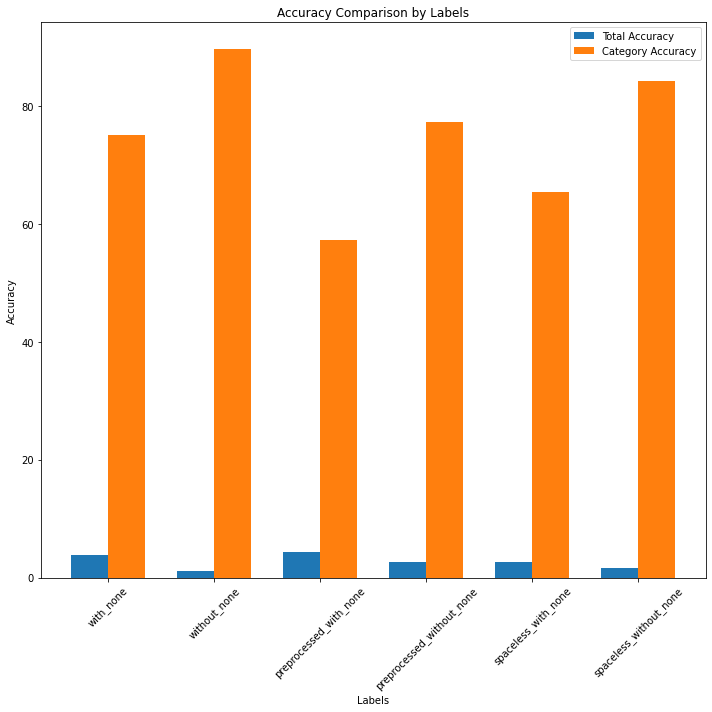

In [44]:
bar_width = 0.35

# Set the positions of the x-axis ticks
x_pos = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(10,10))
tot_accs_bar = ax.bar(x_pos, tot_accs, bar_width, label='Total Accuracy')
cat_accs_bar = ax.bar(x_pos + bar_width, cat_accs, bar_width, label='Category Accuracy')

# Set the labels and title
ax.set_xlabel('Labels')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison by Labels')
ax.set_xticks(x_pos + bar_width / 2)
ax.set_xticklabels(labels, rotation=45)  # Rotate labels by 45 degrees
ax.legend()

# Display the plot
plt.tight_layout()  # Adjust the layout to prevent label overlapping
plt.show()




In [45]:
f1s = []
for i in range(len(con_mats)):
    f1s.append(calculate_f1_scores(con_mats[i]))

<ipython-input-37-9a8269f27bad>:72: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = true_positives / (true_positives + false_positives)
<ipython-input-37-9a8269f27bad>:73: RuntimeWarning: invalid value encountered in longlong_scalars
  recall = true_positives / (true_positives + false_negatives)
